In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import norm
import math
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import statistics as st
import random
import sklearn

# Import data

In [2]:
df = pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
df = df.drop('effective_to_date', axis = 1)

In [4]:
numericals = df.select_dtypes(np.number)
categoricals = df.select_dtypes(np.object)

/var/folders/wq/2vxkh_6d4g7dpxkr5q82nxzh0000gn/T/ipykernel_29181/3149187810.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(np.object)


# Preprocessing

### Check correlation

In [ ]:
df.corr()
# no high correlation

### Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categoricals.coverage = le.fit_transform(categoricals.coverage)
categoricals.education = le.fit_transform(categoricals.education)
categoricals.vehicle_class = le.fit_transform(categoricals.vehicle_class)
categoricals.vehicle_size = le.fit_transform(categoricals.vehicle_size)

### Hot Encoding

In [6]:
categoricals = pd.get_dummies(categoricals, prefix = ['month', 'region','response', 'employment_status', 'gender', 'location_code', 'policy_type', 'marital_status','policy', 'renew_offer_type', 'sales_channel'], columns = ['month', 'region','response', 'employment_status', 'gender', 'policy_type', 'location_code', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel'], drop_first=False)

In [28]:
categoricals

,coverage,education,vehicle_class,vehicle_size,month_feb,month_jan,region_central,region_east,region_north west,region_west region,...,policy_special l2,policy_special l3,renew_offer_type_offer1,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web
0,0,1,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,4,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,2,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,0,1,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
10685,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
10686,1,0,2,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10687,2,1,4,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


### Concatanation

In [7]:
df = pd.concat([categoricals, numericals], axis=1)

# Model

### X-y split & train and test split 

In [27]:
# x-y split
X = df.drop('total_claim_amount', axis=1)
y = df.total_claim_amount

In [26]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

### Standardscaler on numericals

In [11]:
# scale train and test (fit & transform train; only transform test)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # the standard scaler will only work with numericals
X_test_scaled = scaler.transform(X_test)

In [23]:
# train model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.coef_
lr.intercept_

LinearRegression()

array([-3.82944620e+00,  1.90161020e+00, -4.09398596e+00,  4.01231683e-01,
       -1.01672643e+13, -1.01672643e+13,  9.42701385e+14,  5.88849417e+14,
        9.37002782e+14,  9.87871962e+14, -8.25088330e+14, -8.25088330e+14,
        7.29330400e+14,  1.68782838e+15,  7.20180101e+14,  5.94739308e+14,
        1.52045890e+15,  7.84694930e+14,  7.84694930e+14,  1.12765951e+15,
        1.34999493e+15,  3.61175517e+14, -5.52582493e+14, -6.73144202e+14,
       -5.28719096e+14,  9.19284398e+13,  1.27185529e+14,  1.14936168e+14,
       -9.18581901e+12, -1.17898963e+13, -1.48173744e+13, -1.38164131e+14,
       -1.69532793e+14, -1.93236913e+14,  7.55821909e+13,  1.06906625e+14,
        1.07786615e+14,  2.72439828e+14,  2.56351257e+14,  2.02816864e+14,
        1.74087272e+14,  9.98702728e+14,  9.28379731e+14,  8.15106617e+14,
        7.38178261e+14,  7.50000000e-01, -4.31250000e+00,  1.75328125e+02,
        4.71093750e+00, -4.68750000e-01, -2.46875000e+00,  3.27734375e+00])

434.7862033530589

In [13]:
# predict
y_lr_train_pred =  pd.DataFrame(lr.predict(X_train_scaled), columns = ['total_claim_amount'])
y_lr_test_pred = pd.DataFrame(lr.predict(X_test_scaled), columns = ['total_claim_amount'])

In [14]:
# model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_train_ar2 = 1 - (1 - lr_train_r2) * (len(y_train) -1) / (len(y_train) - X_train.shape[1] - 1)
    # has X_train to be the scaled one?

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_test_ar2 = 1 - (1 - lr_test_r2) * (len(y_test) -1) / (len(y_test) - X_test.shape[1] - 1)


lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_test_mse, lr_train_mae, lr_test_mae, lr_train_r2, lr_test_r2, lr_train_ar2, lr_test_ar2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Test MSE', 'Training MAE', 'Test MAE', 'Training R2', 'Test R2', 'Training Ad. R2', 'Test Ad. R2']

lr_results
# error_train < error_test => model ok!

,Method,Training MSE,Test MSE,Training MAE,Test MAE,Training R2,Test R2,Training Ad. R2,Test Ad. R2
0,Linear Regression,19777.106274,19705.603281,96.675058,96.107897,0.768264,0.771191,0.766642,0.767419


## Visualisations

<Figure size 500x500 with 0 Axes>

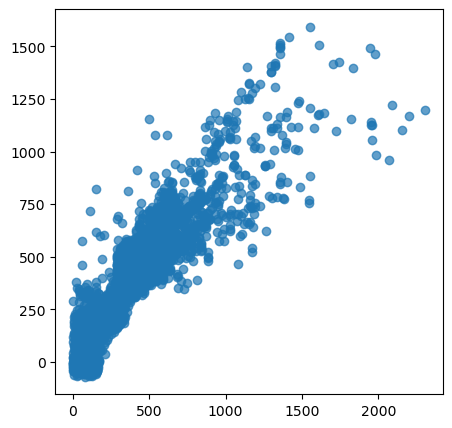

In [30]:
# scatterplot y_test, y_pred
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_lr_test_pred, alpha = 0.7)

<AxesSubplot:>

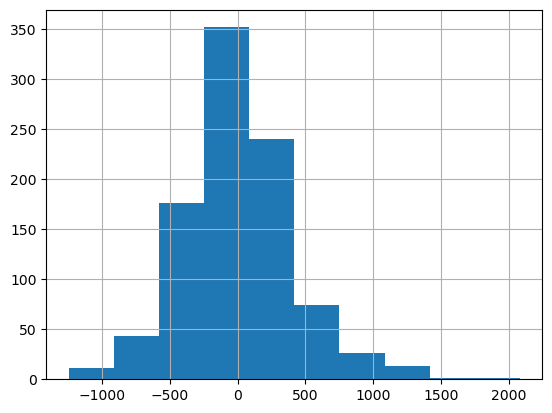

In [16]:
# histogram residuals
residuals = y_test - y_lr_test_pred.total_claim_amount
residuals.hist()

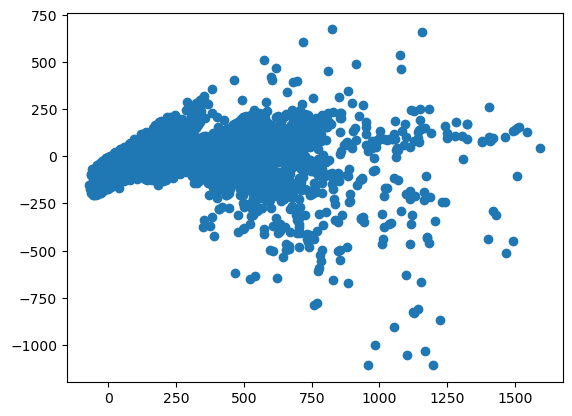

In [19]:
# scatterplot residuals
y_test = y_test.to_numpy().reshape(-1,1)

residuals_error = y_lr_test_pred.to_numpy() - y_test
plt.scatter(y_lr_test_pred, residuals_error)

In [21]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(lr.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
13,employment_status_employed,1.687828e+15
16,employment_status_unemployed,1.520459e+15
20,location_code_personal auto,1.349995e+15
19,location_code_corporate auto,1.127660e+15
41,sales_channel_agent,9.987027e+14
9,region_west region,9.878720e+14
6,region_central,9.427014e+14
8,region_north west,9.370028e+14
42,sales_channel_branch,9.283797e+14
11,response_yes,8.250883e+14


<BarContainer object of 50 artists>

Text(0.5, 1.0, 'Feature importance rankings')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

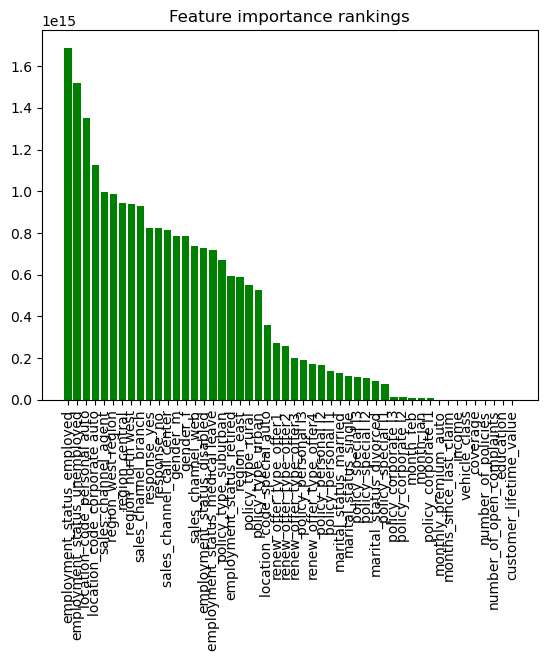

In [25]:
plt.bar(x=features_importances['Attribute'].iloc[:50], height=features_importances['Importance'].iloc[:50], color='green')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# off-topic

# df['region'] = df['region'].cat.rename_categories({'central': 0, 'west region': 1, 'east': 2, 'north west': 3})
# categoricals = df.select_dtypes(include=['category'])
# for col in df.columns:
#    if df[col].dtype == 'category':
#        df[col] = le.fit_transform(df[col])
# change categories quickly
# for col in ['region', 'response', 'coverage',
#       'education', 'month', 'employment_status',
#       'gender', 'location_code', 'marital_status',
#       'policy_type', 'policy', 'renew_offer_type',
#       'sales_channel', 'vehicle_class', 'vehicle_size']: df[col] = df[col].astype('category')